This data approach student achievement insecondary education in schools.
The data attributes include student grades, demographic, social and school related features)
and it was collected by using school reports and questionnaires.
dataset are provided regarding the performance in math subjects:
Mathematics (mat)  datasets were modeled under  regression tasks.


In [1]:
################################## Data Analysis & Calculation ##################################

import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### Data Import

In [2]:
new = pd.read_csv(r"student-mat.csv") #for an earlier version of Excel, you may need to use the file extension of 'xls'

new

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


# Data Type 

In [3]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

# Univariate Analysis

In [4]:
# Let's look at some statistical information about our dataframe.
new.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


# EDA
* Identify & Treatment of Outlier 

<AxesSubplot:>

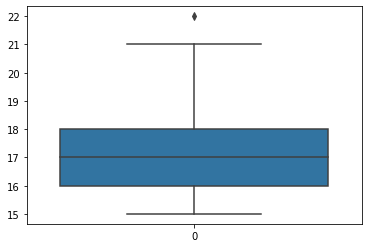

In [5]:
sns.boxplot(data=new.age)

# Winsorizing Technique -- Treatment of Outlier

In [6]:
q1 = new['age'].quantile(0.25)
q3 = new['age'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

21.0

In [7]:
new['age']=np.where(new['age'] > upper_limit,upper_limit,new['age']) # upper limit

<AxesSubplot:>

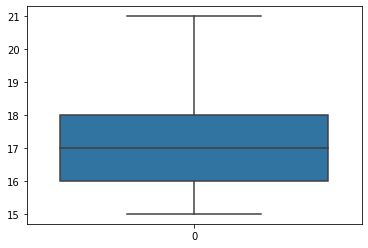

In [8]:
sns.boxplot(data=new.age)

<AxesSubplot:>

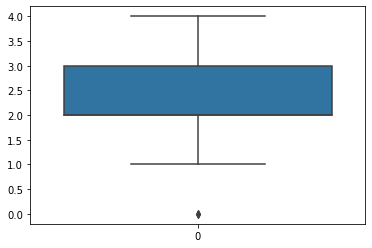

In [9]:
sns.boxplot(data=new.Fedu)

In [10]:
q1 = new['Fedu'].quantile(0.25)
q3 = new['Fedu'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit = q1-1.5*iqr #acceptable range
low_limit 


0.5

In [11]:
new['Fedu']=np.where(new['Fedu'] <low_limit,low_limit,new['Fedu']) # upper limit

<AxesSubplot:>

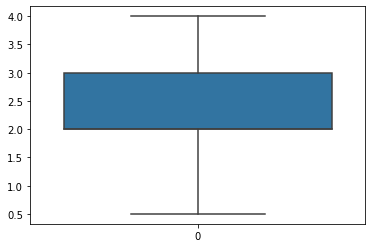

In [12]:
sns.boxplot(data=new.Fedu)

<AxesSubplot:>

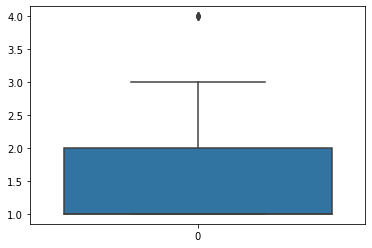

In [13]:
sns.boxplot(data=new.traveltime)

In [14]:
q1 = new['traveltime'].quantile(0.25)
q3 = new['traveltime'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

3.5

In [15]:
new['traveltime']=np.where(new['traveltime'] > upper_limit,upper_limit,new['traveltime']) # upper limit

<AxesSubplot:>

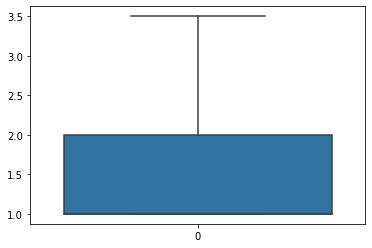

In [16]:
sns.boxplot(data=new.traveltime)

<AxesSubplot:>

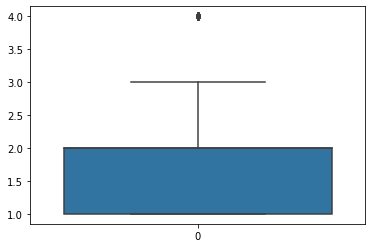

In [17]:
sns.boxplot(data=new.studytime)

In [18]:
q1 = new['studytime'].quantile(0.25)
q3 = new['studytime'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

3.5

In [19]:
new['studytime']=np.where(new['studytime'] > upper_limit,upper_limit,new['studytime']) # upper limit

<AxesSubplot:>

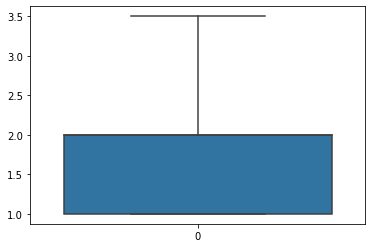

In [20]:
sns.boxplot(data=new.studytime)

<AxesSubplot:>

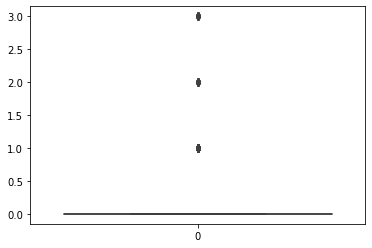

In [21]:
sns.boxplot(data=new.failures)

In [22]:
q1 = new['failures'].quantile(0.25)
q3 = new['failures'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

0.0

In [23]:
new['failures']=np.where(new['failures'] > upper_limit,upper_limit,new['failures']) # upper limit

<AxesSubplot:>

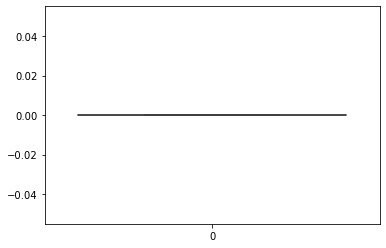

In [24]:
sns.boxplot(data=new.failures)

<AxesSubplot:>

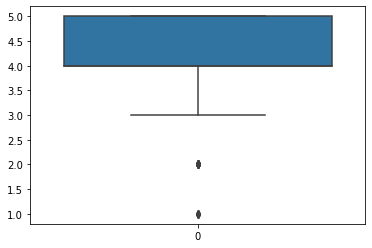

In [25]:
sns.boxplot(data=new.famrel)

In [26]:
q1 = new['famrel'].quantile(0.25)
q3 = new['famrel'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit = q1-1.5*iqr #acceptable range
low_limit

2.5

In [27]:
new['famrel']=np.where(new['famrel'] < low_limit,upper_limit,new['famrel']) # upper limit

<AxesSubplot:>

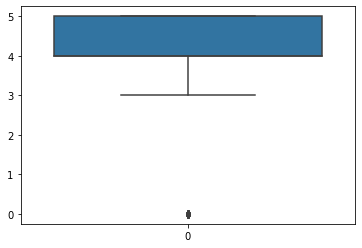

In [28]:
sns.boxplot(data=new.famrel)

<AxesSubplot:>

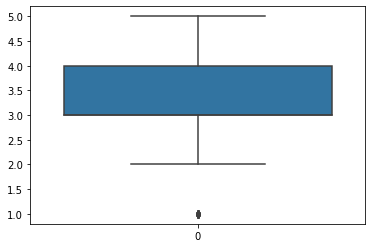

In [29]:
sns.boxplot(data=new.freetime)

In [30]:
q1 = new['freetime'].quantile(0.25)
q3 = new['freetime'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit = q1-1.5*iqr #acceptable range
low_limit

1.5

In [31]:
new['freetime']=np.where(new['freetime'] < low_limit,low_limit,new['freetime']) # upper limit

<AxesSubplot:>

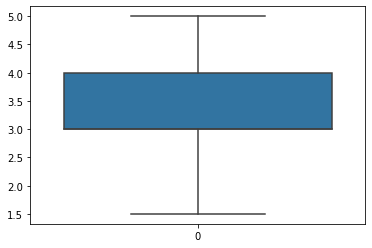

In [32]:
sns.boxplot(data=new.freetime)

<AxesSubplot:>

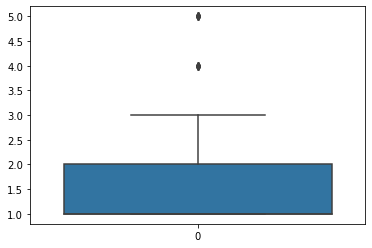

In [33]:
sns.boxplot(data=new.Dalc)

In [34]:
q1 = new['Dalc'].quantile(0.25)
q3 = new['Dalc'].quantile(0.75)
iqr = q3-q1 #Interquartile range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

3.5

In [35]:
new['Dalc']=np.where(new['Dalc'] > upper_limit,upper_limit,new['Dalc']) # upper limit

<AxesSubplot:>

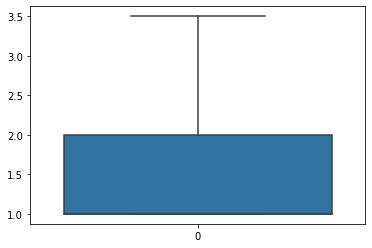

In [36]:
sns.boxplot(data=new.Dalc)

<AxesSubplot:>

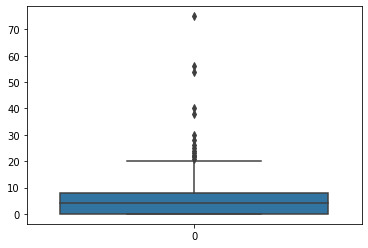

In [37]:
sns.boxplot(data=new.absences)

In [38]:
q1 = new['absences'].quantile(0.25)
q3 = new['absences'].quantile(0.75)
iqr = q3-q1 #Interquartile range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

20.0

In [39]:
new['absences']=np.where(new['absences'] > upper_limit,upper_limit,new['absences']) # upper limit

<AxesSubplot:>

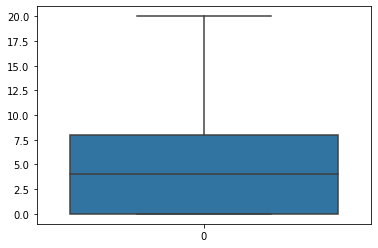

In [40]:
sns.boxplot(data=new.absences)

<AxesSubplot:>

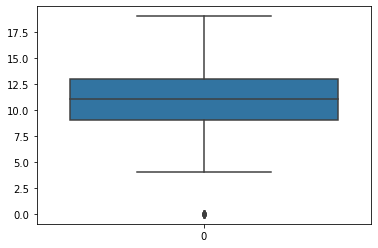

In [41]:
sns.boxplot(data=new.G2)

In [42]:
q1 = new['G2'].quantile(0.25)
q3 = new['G2'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit = q1-1.5*iqr #acceptable range
low_limit

3.0

In [43]:
new['G2']=np.where(new['G2'] < low_limit,low_limit,new['G2']) # upper limit

<AxesSubplot:>

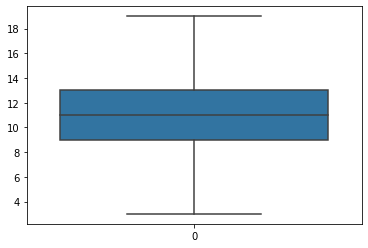

In [44]:
sns.boxplot(data=new.G2)

<AxesSubplot:>

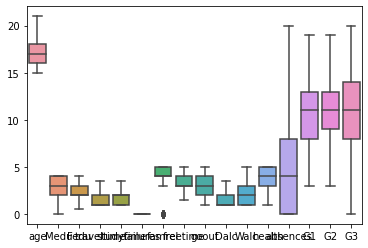

In [45]:
sns.boxplot(data=new)

In [46]:
new.isna().sum()  # no missing data

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### Step 3 : Splitting the data in Training and Test set
Using sklearn we split 70% of our data into training set and rest in test set.

Setting random_state will give the same training and test set everytime on running the code

In [47]:
new.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4.0,at_home,teacher,...,4.0,3.0,4,1.0,1,3,6.0,5,6.0,6
1,GP,F,17.0,U,GT3,T,1,1.0,at_home,other,...,5.0,3.0,3,1.0,1,3,4.0,5,5.0,6
2,GP,F,15.0,U,LE3,T,1,1.0,at_home,other,...,4.0,3.0,2,2.0,3,3,10.0,7,8.0,10
3,GP,F,15.0,U,GT3,T,4,2.0,health,services,...,3.0,2.0,2,1.0,1,5,2.0,15,14.0,15
4,GP,F,16.0,U,GT3,T,3,3.0,other,other,...,4.0,3.0,2,1.0,2,5,4.0,6,10.0,10


In [48]:
# Putting feature variable to X
X = new.drop('G3', axis= 1)

# Putting response variable to y
y = new[['G3']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=120)

In [49]:
df = pd.concat([y_train, X_train], axis=1)
df.head()

,G3,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
343,0,GP,F,17.0,U,GT3,A,2,2.0,at_home,...,yes,3.0,3.0,1,1.0,2,4,0.0,9,8.0
249,15,GP,M,16.0,U,GT3,T,0,2.0,other,...,no,4.0,3.0,2,2.0,4,5,0.0,13,15.0
275,12,GP,F,17.0,U,LE3,T,2,2.0,services,...,yes,4.0,4.0,4,2.0,3,5,6.0,12,12.0
291,15,GP,F,17.0,U,GT3,T,4,3.0,health,...,no,4.0,2.0,2,1.0,2,3,0.0,15,15.0
23,12,GP,M,16.0,U,LE3,T,2,2.0,other,...,no,5.0,4.0,4,2.0,4,5,0.0,13,13.0


In [50]:
df1=df.drop(['Fedu','failures','famrel','school','sex','address','famsize','Pstatus'
         ,'Mjob','Fjob','internet','romantic','reason','guardian',
         'schoolsup',
         'famsup','paid','nursery','higher','activities']
        ,axis=1)
df1

,G3,age,Medu,traveltime,studytime,freetime,goout,Dalc,Walc,health,absences,G1,G2
343,0,17.0,2,1.0,2.0,3.0,1,1.0,2,4,0.0,9,8.0
249,15,16.0,0,1.0,1.0,3.0,2,2.0,4,5,0.0,13,15.0
275,12,17.0,2,2.0,2.0,4.0,4,2.0,3,5,6.0,12,12.0
291,15,17.0,4,1.0,3.0,2.0,2,1.0,2,3,0.0,15,15.0
23,12,16.0,2,2.0,2.0,4.0,4,2.0,4,5,0.0,13,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,10,17.0,2,2.0,2.0,4.0,3,1.0,1,3,2.0,11,11.0
223,13,18.0,2,2.0,2.0,3.0,3,3.5,5,4,0.0,12,13.0
158,15,16.0,2,3.0,1.0,2.0,2,1.0,2,3,2.0,17,15.0
256,13,17.0,4,1.0,3.5,2.0,3,1.0,1,4,6.0,14,12.0


# Correlation Matrix

In [51]:
df1.corr()


,G3,age,Medu,traveltime,studytime,freetime,goout,Dalc,Walc,health,absences,G1,G2
G3,1.000000,-0.099609,0.198770,-0.105139,0.124761,0.041966,-0.113872,-0.045095,-0.028502,-0.066004,0.084018,0.804642,0.910801
age,-0.099609,1.000000,-0.133880,0.019550,0.015020,0.025294,0.111560,0.099384,0.076969,-0.017791,0.200971,-0.038162,-0.123373
Medu,0.198770,-0.133880,1.000000,-0.145792,0.081964,0.057735,0.059080,0.038571,-0.079236,-0.062815,0.151796,0.179721,0.186358
traveltime,-0.105139,0.019550,-0.145792,1.000000,-0.086730,-0.004627,0.059337,0.130909,0.125262,-0.015728,-0.069236,-0.110647,-0.144871
studytime,0.124761,0.015020,0.081964,-0.086730,1.000000,-0.138530,-0.091793,-0.222215,-0.311522,-0.071289,-0.087544,0.185986,0.158977
freetime,0.041966,0.025294,0.057735,-0.004627,-0.138530,1.000000,0.354988,0.183516,0.143300,0.038267,0.000917,0.015504,0.006549
goout,-0.113872,0.111560,0.059080,0.059337,-0.091793,0.354988,1.000000,0.288693,0.424158,-0.046732,0.065792,-0.163634,-0.165555
Dalc,-0.045095,0.099384,0.038571,0.130909,-0.222215,0.183516,0.288693,1.000000,0.637999,0.109840,0.193591,-0.116564,-0.096610
Walc,-0.028502,0.076969,-0.079236,0.125262,-0.311522,0.143300,0.424158,0.637999,1.000000,0.081630,0.195908,-0.155525,-0.112135
health,-0.066004,-0.017791,-0.062815,-0.015728,-0.071289,0.038267,-0.046732,0.109840,0.081630,1.000000,-0.074790,-0.085881,-0.098027


<AxesSubplot:>

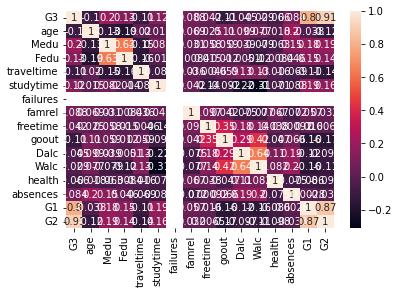

In [52]:
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:title={'center':'G3 vs G2'}, xlabel='G2', ylabel='G3'>

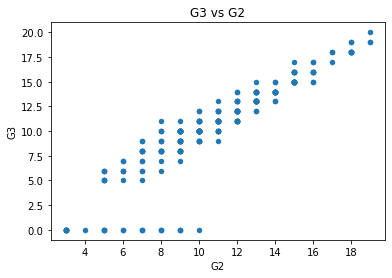

In [53]:
df.plot.scatter(x='G2', y='G3', title='G3 vs G2')

G2 have 91% strong positve correlation with G3

G2 have high impact on G3

There is colinearity in data

# Multicolinearity (with the help of VIF)¶

In [54]:
X1=df1.drop(['G3'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

age           46.777127
Medu           7.701331
traveltime     5.862341
studytime      8.723801
freetime      15.072732
goout         12.914568
Dalc           8.617681
Walc           8.877958
health         7.889296
absences       2.160950
G1            51.833161
G2            45.183563
dtype: float64

In [55]:
df1=df1.drop(['G1'],axis=1)
df1

,G3,age,Medu,traveltime,studytime,freetime,goout,Dalc,Walc,health,absences,G2
343,0,17.0,2,1.0,2.0,3.0,1,1.0,2,4,0.0,8.0
249,15,16.0,0,1.0,1.0,3.0,2,2.0,4,5,0.0,15.0
275,12,17.0,2,2.0,2.0,4.0,4,2.0,3,5,6.0,12.0
291,15,17.0,4,1.0,3.0,2.0,2,1.0,2,3,0.0,15.0
23,12,16.0,2,2.0,2.0,4.0,4,2.0,4,5,0.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
382,10,17.0,2,2.0,2.0,4.0,3,1.0,1,3,2.0,11.0
223,13,18.0,2,2.0,2.0,3.0,3,3.5,5,4,0.0,13.0
158,15,16.0,2,3.0,1.0,2.0,2,1.0,2,3,2.0,15.0
256,13,17.0,4,1.0,3.5,2.0,3,1.0,1,4,6.0,12.0


In [56]:
X1=df1.drop(['G3'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

age           45.583070
Medu           7.698127
traveltime     5.846704
studytime      8.694827
freetime      15.051188
goout         12.908486
Dalc           8.615944
Walc           8.813025
health         7.888711
absences       2.148628
G2            10.883555
dtype: float64

In [57]:
df1=df1.drop(['age'],axis=1)
df1

,G3,Medu,traveltime,studytime,freetime,goout,Dalc,Walc,health,absences,G2
343,0,2,1.0,2.0,3.0,1,1.0,2,4,0.0,8.0
249,15,0,1.0,1.0,3.0,2,2.0,4,5,0.0,15.0
275,12,2,2.0,2.0,4.0,4,2.0,3,5,6.0,12.0
291,15,4,1.0,3.0,2.0,2,1.0,2,3,0.0,15.0
23,12,2,2.0,2.0,4.0,4,2.0,4,5,0.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...
382,10,2,2.0,2.0,4.0,3,1.0,1,3,2.0,11.0
223,13,2,2.0,2.0,3.0,3,3.5,5,4,0.0,13.0
158,15,2,3.0,1.0,2.0,2,1.0,2,3,2.0,15.0
256,13,4,1.0,3.5,2.0,3,1.0,1,4,6.0,12.0


In [58]:
X1=df1.drop(['G3'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Medu           7.588863
traveltime     5.152697
studytime      7.285979
freetime      13.710441
goout         12.268333
Dalc           8.598565
Walc           8.763845
health         6.804081
absences       2.039462
G2             9.609895
dtype: float64

In [59]:
df1=df1.drop(['freetime'],axis=1)
df1

,G3,Medu,traveltime,studytime,goout,Dalc,Walc,health,absences,G2
343,0,2,1.0,2.0,1,1.0,2,4,0.0,8.0
249,15,0,1.0,1.0,2,2.0,4,5,0.0,15.0
275,12,2,2.0,2.0,4,2.0,3,5,6.0,12.0
291,15,4,1.0,3.0,2,1.0,2,3,0.0,15.0
23,12,2,2.0,2.0,4,2.0,4,5,0.0,13.0
...,...,...,...,...,...,...,...,...,...,...
382,10,2,2.0,2.0,3,1.0,1,3,2.0,11.0
223,13,2,2.0,2.0,3,3.5,5,4,0.0,13.0
158,15,2,3.0,1.0,2,1.0,2,3,2.0,15.0
256,13,4,1.0,3.5,3,1.0,1,4,6.0,12.0


In [60]:
X1=df1.drop(['G3'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Medu          7.505561
traveltime    5.082319
studytime     7.285321
goout         9.838138
Dalc          8.457123
Walc          8.726532
health        6.459584
absences      2.039218
G2            8.928067
dtype: float64

# Model Building
H0 :- There is no Linear relationship between G3 and independent variable

Vs

H1 :- There is Linear relationship between G3 and independent variable

Alpha = 0.05 (5%)

In [61]:
import statsmodels.formula.api as smf
model = smf.ols('G3 ~ Medu+traveltime+studytime+goout+Dalc+Walc+health+absences+G2',data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     165.0
Date:                Tue, 22 Nov 2022   Prob (F-statistic):          1.96e-103
Time:                        20:08:56   Log-Likelihood:                -552.53
No. Observations:                 276   AIC:                             1125.
Df Residuals:                     266   BIC:                             1161.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.4395      0.795     -5.584      0.000      -6.005      -2.874
Medu           0.0919      0.104      0.882      0.379      -0.113       0.297
traveltime     0.2462      0.171      1.444      0.150      -0.090       0.582
studytime      0.0326      0.152      0.215      0.830      -0.267       0.332
goout          0.0501      0.112      0.445      0.656      -0.171       0.272
Dalc          -0.1829      0.201     -0.909      0.364      -0.579       0.213
Walc           0.2300      0.125      1.842      0.067      -0.016       0.476
health         0.1141      0.083      1.374      0.170      -0.049       0.278
absences       0.0948      0.022      4.336      0.000       0.052       0.138
G2             1.1975      0.033     36.587      0.000       1.133       1.262
==============================================================================
Omnibus:                      120.406   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              502.430
Skew:                          -1.823   Prob(JB):                    7.92e-110
Kurtosis:                       8.513   Cond. No.                         103.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# removing the insignificant variable 
model2=smf.ols('G3 ~absences+G2',data=df1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     730.4
Date:                Tue, 22 Nov 2022   Prob (F-statistic):          2.58e-110
Time:                        20:08:56   Log-Likelihood:                -557.49
No. Observations:                 276   AIC:                             1121.
Df Residuals:                     273   BIC:                             1132.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8287      0.374     -7.573      0.000      -3.564      -2.093
absences       0.0993      0.021      4.745      0.000       0.058       0.141
G2             1.1851      0.031     38.060      0.000       1.124       1.246
==============================================================================
Omnibus:                      136.439   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              682.725
Skew:                          -2.030   Prob(JB):                    5.60e-149
Kurtosis:                       9.549   Cond. No.                         42.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is Linear relationship between G3 and absences,G2

84% is accuracy of model , so we say model is good fit

Y = -2.8287 + 0.0993* absences + 1.1851 * G2

# Multicolinearity (with the help of VIF)

In [63]:
X1=df1.loc[:,['absences', 'G2']]
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])], 
                          index=X1.columns)
series_before

absences    1.708414
G2          1.708414
dtype: float64

# Assumption of Model

Linearity

Normality

Homoscedasicity

Model Error has to be independently identificaly Distibuted

In [64]:
new.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4.0,at_home,teacher,...,4.0,3.0,4,1.0,1,3,6.0,5,6.0,6
1,GP,F,17.0,U,GT3,T,1,1.0,at_home,other,...,5.0,3.0,3,1.0,1,3,4.0,5,5.0,6
2,GP,F,15.0,U,LE3,T,1,1.0,at_home,other,...,4.0,3.0,2,2.0,3,3,10.0,7,8.0,10
3,GP,F,15.0,U,GT3,T,4,2.0,health,services,...,3.0,2.0,2,1.0,1,5,2.0,15,14.0,15
4,GP,F,16.0,U,GT3,T,3,3.0,other,other,...,4.0,3.0,2,1.0,2,5,4.0,6,10.0,10


In [65]:
Y = -2.8287 + (0.0993*6.0)+1.1851*6.0
Y

4.8777

In [66]:
df1['fitted_value']=model2.fittedvalues #Predicted Value
df1['residual']=model2.resid  #Error
df1.head()

,G3,Medu,traveltime,studytime,goout,Dalc,Walc,health,absences,G2,fitted_value,residual
343,0,2,1.0,2.0,1,1.0,2,4,0.0,8.0,6.652259,-6.652259
249,15,0,1.0,1.0,2,2.0,4,5,0.0,15.0,14.948131,0.051869
275,12,2,2.0,2.0,4,2.0,3,5,6.0,12.0,11.988808,0.011192
291,15,4,1.0,3.0,2,1.0,2,3,0.0,15.0,14.948131,0.051869
23,12,2,2.0,2.0,4,2.0,4,5,0.0,13.0,12.577882,-0.577882


## Linearity

<AxesSubplot:title={'center':'G3 vs G2 '}, xlabel='G2', ylabel='G3'>

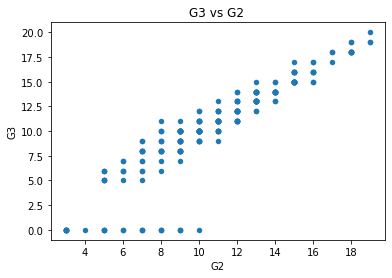

In [70]:
df1.plot.scatter(x='G2', y='G3', title='G3 vs G2 ')

# Homoscedasicity

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

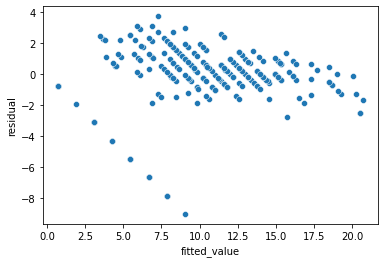

In [71]:
sns.scatterplot(x='fitted_value', y='residual',data=df1)

# Normality

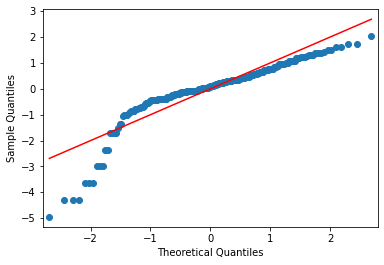

In [73]:
import statsmodels.api as sm
fig = sm.qqplot(df1['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

# Model Error are IID

<AxesSubplot:ylabel='Frequency'>

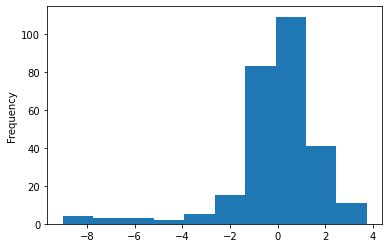

In [75]:
df1['residual'].plot.hist()

# Prediction on Test Data (unseen data)

In [76]:
df_test=pd.concat([X_test,y_test],axis=1)

df_test.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
118,GP,M,17.0,R,GT3,T,1,3.0,other,other,...,5.0,2.0,4,1.0,4,5,20.0,9,7.0,8
240,GP,M,17.0,U,LE3,T,4,3.0,health,other,...,0.0,5.0,5,1.0,4,5,14.0,12,12.0,12
265,GP,M,18.0,R,LE3,A,3,4.0,other,other,...,4.0,2.0,5,3.0,4,1,13.0,17,17.0,17
19,GP,M,16.0,U,LE3,T,4,3.0,health,other,...,3.0,1.5,3,1.0,3,5,4.0,8,10.0,10
163,GP,M,17.0,U,GT3,T,1,3.0,at_home,services,...,5.0,3.0,3,1.0,4,2,2.0,10,10.0,10


In [77]:
df_test['Prediction']=model2.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Prediction
118,GP,M,17.0,R,GT3,T,1,3.0,other,other,...,2.0,4,1.0,4,5,20.0,9,7.0,8,7.453972
240,GP,M,17.0,U,LE3,T,4,3.0,health,other,...,5.0,5,1.0,4,5,14.0,12,12.0,12,12.783544
265,GP,M,18.0,R,LE3,A,3,4.0,other,other,...,2.0,5,3.0,4,1,13.0,17,17.0,17,18.609824
19,GP,M,16.0,U,LE3,T,4,3.0,health,other,...,1.5,3,1.0,3,5,4.0,8,10.0,10,9.419876
163,GP,M,17.0,U,GT3,T,1,3.0,at_home,services,...,3.0,3,1.0,4,2,2.0,10,10.0,10,9.221192


In [78]:


Y = -2.8287 + (0.0993*20.0)+1.1851*7.0
Y

7.453

# Test

In [80]:
from sklearn.metrics import r2_score
r2 = r2_score(df_test.G3, df_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.81


# Train

In [82]:
from sklearn.metrics import r2_score
r2 = r2_score(df.G3, df1.fitted_value)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.84


 #### Model is good fit & Performance on Test data is also good fit